In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
X = np.random.uniform(-2,2,size=(2000,2))
y = np.array(X[:,0] ** 2 + X[:,1] < 1.5,dtype = 'int')

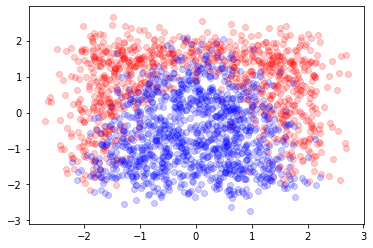

In [126]:
plt.scatter(X[y==0,0],X[y==0,1],c='r',alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],c='b',alpha=0.2)
plt.show()

In [84]:
X += np.random.normal(0,0.3,size=(2000,2))

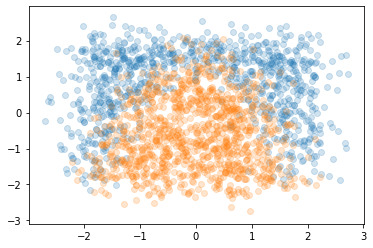

In [85]:
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [45]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


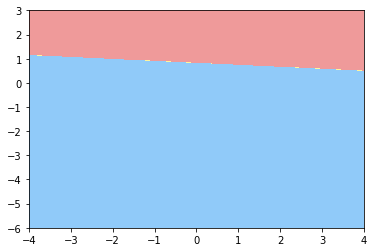

In [47]:
log_reg.fit(X,y)

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


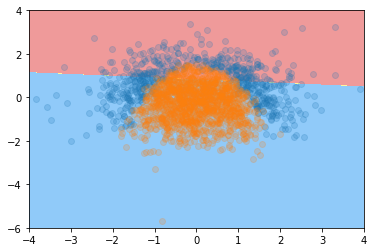

In [51]:
plot_decision_boundary(log_reg,[-4,4,-6,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.show()

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
def PolynomialLogisticRegression(degree=2,C=1,penalty="l2"):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C,penalty=penalty)),
    ])

In [106]:
log_reg_2 = PolynomialLogisticRegression(degree=2,C=0.1,penalty='l2')
log_reg_1 = PolynomialLogisticRegression(degree=2,C=0.1,penalty='l1')
log_reg_4 = PolynomialLogisticRegression(degree=10,C=0.1,penalty='l2')
log_reg_3 = PolynomialLogisticRegression(degree=10,C=0.1,penalty='l1')
log_reg_6 = PolynomialLogisticRegression(degree=10,C=1e6)
log_reg_5 = PolynomialLogisticRegression(degree=2,C=1e6)

In [107]:
log_reg_1.fit(X_train,y_train)
log_reg_2.fit(X_train,y_train)
log_reg_3.fit(X_train,y_train)
log_reg_4.fit(X_train,y_train)
log_reg_5.fit(X_train,y_train)
log_reg_6.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [108]:
print("reg1")
print(log_reg_1.score(X_train,y_train))
print(log_reg_1.score(X_test,y_test))
print("reg2")
print(log_reg_2.score(X_train,y_train))
print(log_reg_2.score(X_test,y_test))
print("reg3")
print(log_reg_3.score(X_train,y_train))
print(log_reg_3.score(X_test,y_test))
print("reg4")
print(log_reg_4.score(X_train,y_train))
print(log_reg_4.score(X_test,y_test))
print("reg5")
print(log_reg_5.score(X_train,y_train))
print(log_reg_5.score(X_test,y_test))
print("reg6")
print(log_reg_6.score(X_train,y_train))
print(log_reg_6.score(X_test,y_test))

reg1
0.8846666666666667
0.88
reg2
0.8846666666666667
0.87
reg3
0.8833333333333333
0.868
reg4
0.8826666666666667
0.874
reg5
0.8866666666666667
0.87
reg6
0.888
0.872


In [129]:
x1_line = np.linspace(-2,2,100)
x2_line = -x1_line**2 + 1.5

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


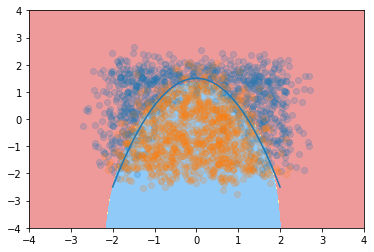

In [130]:
plot_decision_boundary(log_reg_1,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


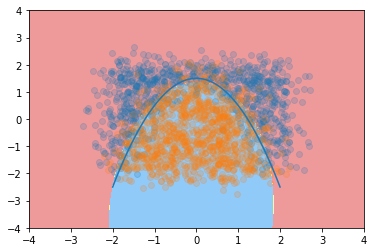

In [131]:
plot_decision_boundary(log_reg_2,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


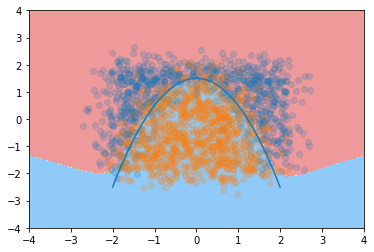

In [132]:
plot_decision_boundary(log_reg_3,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


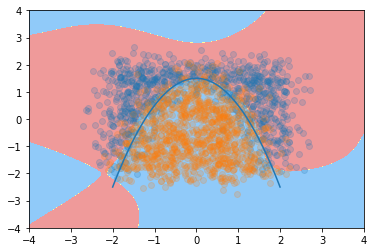

In [133]:
plot_decision_boundary(log_reg_4,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


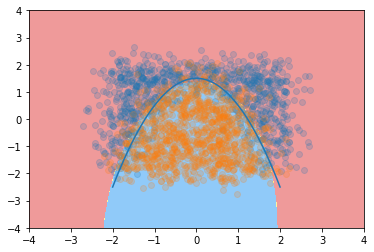

In [134]:
plot_decision_boundary(log_reg_5,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


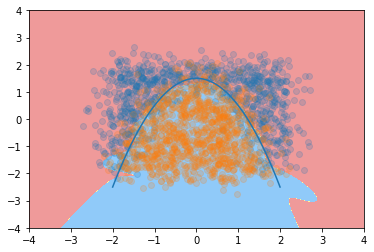

In [135]:
plot_decision_boundary(log_reg_6,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.2)
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.2)
plt.plot(x1_line,x2_line)
plt.show()

In [136]:
 ## 使用所有数据


In [137]:
from sklearn.datasets import load_iris

In [138]:
iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [139]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

In [140]:
log_reg2 = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.9473684210526315

In [141]:
from sklearn.datasets import load_digits

In [142]:
digits = load_digits()
X = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [143]:
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9622222222222222

In [144]:
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.9666666666666667